In [1]:
import yt
import matplotlib.pyplot as plt
import numpy as np

# set matplotlib formatting to be the same as yt
plt.rcParams['font.size'] = 14
plt.rcParams['font.family'] = 'serif'
plt.rcParams['mathtext.fontset'] = 'stix'

In [2]:
# load data from file
ds0 = yt.load('../myprob1h/plt_1d_00000/', hint="castro")
ds1 = yt.load('../myprob1h/plt_1d_16500/', hint="castro")
ds2 = yt.load('../myprob1h/plt_1d_18000/', hint="castro")
ds3 = yt.load('../myprob1h/plt_1d_18200/', hint="castro")
ds4 = yt.load('../myprob1h/plt_1d_18248/', hint="castro")

data = [ds0, ds1, ds2, ds3, ds4]  #choose the datafiles to be plotted

yt : [INFO     ] 2024-09-30 13:12:26,390 Parameters: current_time              = 0.0
yt : [INFO     ] 2024-09-30 13:12:26,391 Parameters: domain_dimensions         = [10240     1     1]
yt : [INFO     ] 2024-09-30 13:12:26,397 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2024-09-30 13:12:26,405 Parameters: domain_right_edge         = [3.e+08 1.e+00 1.e+00]
yt : [INFO     ] 2024-09-30 13:12:26,652 Parameters: current_time              = 0.0513887737510704
yt : [INFO     ] 2024-09-30 13:12:26,659 Parameters: domain_dimensions         = [10240     1     1]
yt : [INFO     ] 2024-09-30 13:12:26,668 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2024-09-30 13:12:26,674 Parameters: domain_right_edge         = [3.e+08 1.e+00 1.e+00]
yt : [INFO     ] 2024-09-30 13:12:26,960 Parameters: current_time              = 0.0531339796984801
yt : [INFO     ] 2024-09-30 13:12:26,962 Parameters: domain_dimensions         = [10240     1     1]
yt : [INFO     ] 202

In [3]:
ds0.derived_field_list   # list of quantities that can be plotted

[('boxlib', 'Temp'),
 ('boxlib', 'cell_volume'),
 ('boxlib', 'density'),
 ('boxlib', 'dphi'),
 ('boxlib', 'dr'),
 ('boxlib', 'dtheta'),
 ('boxlib', 'grav_x'),
 ('boxlib', 'grav_y'),
 ('boxlib', 'grav_z'),
 ('boxlib', 'path_element_phi'),
 ('boxlib', 'path_element_r'),
 ('boxlib', 'path_element_theta'),
 ('boxlib', 'phi'),
 ('boxlib', 'phiGrav'),
 ('boxlib', 'r'),
 ('boxlib', 'rho_C12'),
 ('boxlib', 'rho_E'),
 ('boxlib', 'rho_Mg24'),
 ('boxlib', 'rho_O16'),
 ('boxlib', 'rho_e'),
 ('boxlib', 'theta'),
 ('boxlib', 'volume'),
 ('boxlib', 'xmom'),
 ('boxlib', 'ymom'),
 ('boxlib', 'zmom'),
 ('gas', 'averaged_density'),
 ('gas', 'cell_mass'),
 ('gas', 'cell_volume'),
 ('gas', 'density'),
 ('gas', 'density_gradient_magnitude'),
 ('gas', 'density_gradient_phi'),
 ('gas', 'density_gradient_r'),
 ('gas', 'density_gradient_theta'),
 ('gas', 'dphi'),
 ('gas', 'dr'),
 ('gas', 'dtheta'),
 ('gas', 'dynamical_time'),
 ('gas', 'jeans_mass'),
 ('gas', 'kT'),
 ('gas', 'mass'),
 ('gas', 'mean_molecular_wei

In [8]:
# setting rcparams for our plots
plt.rcParams['font.size'] = 20
plt.rcParams['lines.linewidth'] = 2.5
plt.rcParams['axes.labelsize'] = 24
plt.rcParams['axes.titlesize'] = 24
plt.rcParams['xtick.labelsize'] = 24
plt.rcParams['ytick.labelsize'] = 24

# Define custom colors (you can choose any colors you like)
custom_colors = ["blue", "fuchsia", "cyan", "lime", "purple", "k"]

In [4]:
# set the initial density and initial radius
rho0 = 2.8e8 * yt.units.g / yt.units.cm**3
r0 = 2.39e8 * yt.units.cm  # initial radius, equivalent to 100Rs
rb = 3e8 * yt.units.cm  # box size
T0 = 1e-26 * yt.units.K   # initial temperature

G = 6.67428e-8      # Gravitational constant in cgs units
c = 2.99e10         # Speed of light in cgs units
M = 16e33   # in grams, equivalent to 8 solar mass
Rs = 2 * G * M / c ** 2     # Gravitational radius/ Schwarzschild radius
Rs = Rs * yt.units.cm      # add  units to the Gravitational radius
u0 = np.sqrt(Rs / r0) * c  # initial velocity
u0 = u0 * yt.units.cm/yt.units.s
tc = 0.05326593767010977 * yt.units.s     # collapse timescale
rm = rb/Rs     # set the extrema

NB = 10240    # number of bins or resolution

In [5]:
# define a function to convert radius into the required unit
def my_r(field, data):
    return data['gas', 'r']/Rs

# define a function to convert density into the required unit
def my_density(field, data):
    return data['gas', 'density']/rho0

# define a function to convert momentum density into the required unit
def my_momentum(field, data):
    return np.abs(data['boxlib', 'xmom'])/(rho0 * c * (yt.units.cm / yt.units.s))

def my_velocity(field, data):
    return (data['boxlib', 'xmom']) / (data['gas', 'density'] * c * (yt.units.cm / yt.units.s))

# define a function to convert temperature into the required unit
def my_temp(field, data):
    return data['gas', 'temperature']

# define a function to convert pressure into the required unit
def my_press(field, data):
    return data['boxlib', 'rho_e']  / (1 * yt.units.erg/yt.units.cm**3)

def my_gpress(field, data):
    return np.abs(data['boxlib', 'grav_x']) * data['gas', 'density'] * data['gas', 'r'] * (1./3.)

def my_mass(field, data):
    return (4./3.)*np.pi*((data['gas', 'r'])**3)*data['gas', 'density']/(2e33*yt.units.g)

def my_rs(field, data):
    return (2*G*(data['gas', 'my_mass'])*2e33/(c**2))*(yt.units.cm/Rs)

In [6]:
# Plotting the density profile

# R = []   # stores radius for each timestep
T = []   # stores the time elapsed
D = []   # stores the maximum density of each profile
profiles_dens = []  # stores the density profiles to be plotted
labels_dens = []   # stores the labels for each of the profiles


for ds in data:
    
    my_sphere = ds.sphere([0.0, 0.0, 0.0], rb)  # define a sphere centered at (0, 0, 0) with radius rb containing the dataset
    
    # add a new density field with the required units
    ds.add_field(("gas", "my_density"), units="dimensionless", function=my_density, sampling_type='cell', force_override=True)
    # add a new radius field with the required units
    ds.add_field(("gas", "my_r"), units="dimensionless", function=my_r, sampling_type='cell', force_override=True)
    # create a density profile with the newly defined density and radius fields
    profile = yt.create_profile(
    data_source=my_sphere,
    bin_fields=[("gas", "my_r")],
    fields=[("gas", "my_density")],
    n_bins=NB,
    units=dict(my_r="dimensionless", my_density="dimensionless"),
    logs=dict(my_r=False),
    weight_field=None,
    extrema=dict(my_r=(0, rm)),
    )
    profiles_dens.append(profile)
    labels_dens.append(rf"t = {ds.current_time.value/tc.value:.5f} $t_c$")
    # for i in range(1, len(profile[('gas', 'my_density')])):
    #     if profile[('gas', 'my_density')][i] < 0.5*profile[('gas', 'my_density')][i-1]:
    #         decreasing_density_location = profile.x[i]
    #         break
    # R.append(decreasing_density_location.value)
    T.append(ds.current_time.value/tc.value)
    D.append(profile[('gas', 'my_density')][0])


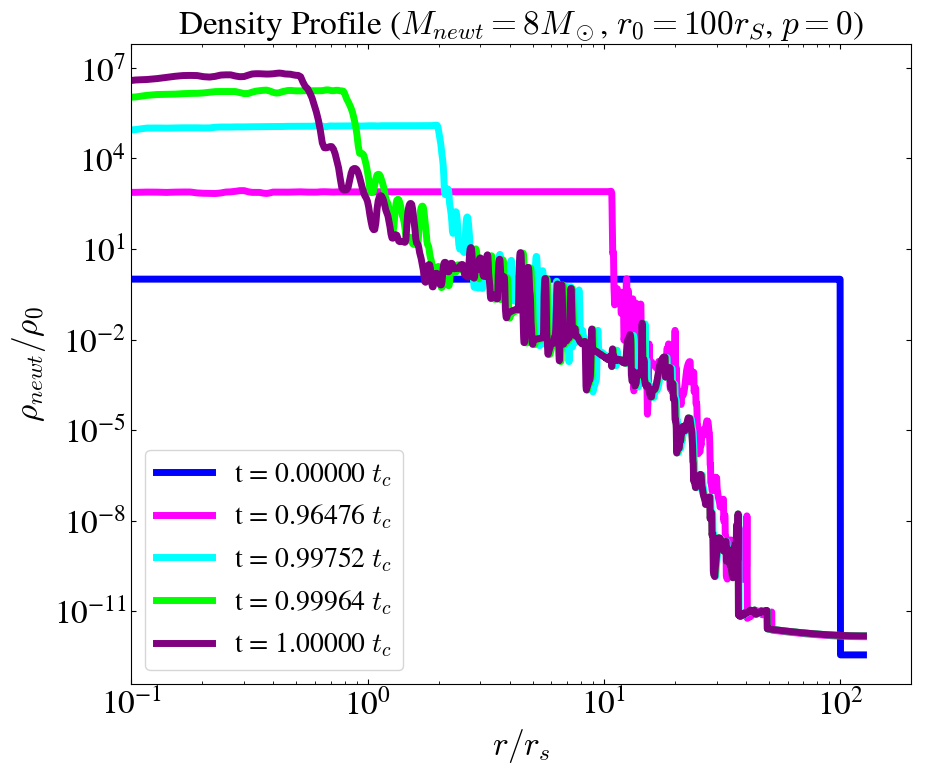

In [9]:
# Your existing data
den = []  # empty list to store density profiles as numpy arrays
for i in range(len(profiles_dens)):
    den.append(np.asarray(profiles_dens[i]["gas", "my_density"]))
radi = np.asarray(profiles_dens[0].x)

with plt.style.context("yt.default"):
    fig, ax = plt.subplots(figsize=(10, 8))
    for i in range(len(profiles_dens)):
        ax.plot(radi, den[i], label=labels_dens[i], color=custom_colors[i], lw=5)

    ax.set_xlabel(r"$r/r_s$")
    ax.set_ylabel(r"$\rho_{newt}/\rho_0$")
    ax.set_xlim(1e-1, 2e2)
    ax.set_title(r"Density Profile ($M_{newt}=8M_\odot$, $r_0 = 100r_S$, $p=0$)")
    ax.set_yscale("log")
    ax.set_xscale("log")
    ax.legend(loc="lower left")
    fig.subplots_adjust(left=0.12, right=0.9, bottom=0.1, top=0.9, wspace=0.2, hspace=0.2)

# plt.savefig("th_dens1.pdf", format="pdf")
plt.show()

In [11]:
mass_shell = np.zeros([len(profiles_dens), len(profiles_dens[0][("gas", "my_density")])])
for i in range(len(profiles_dens)):
    # calculate the mass of all shells
    for j in range(len(np.asarray(profiles_dens[i][("gas", "my_density")]))):
        mass_shell[i, j] = np.abs(np.asarray(profiles_dens[i][("gas", "my_density")])[j] * rho0.value * (4./3.)*np.pi*((((profiles_dens[i].x)[j]*Rs.value)**3) 
                            - (((profiles_dens[i].x)[j-1]*Rs.value)**3)))
        mass_shell[i, 0] = 0  # set the mass at the centre to 0
        
r_shell = np.asarray(profiles_dens[0].x)  # stores the radial coordinates

In [14]:
indx = []  # stores the index for shell with maximum mass
radius = np.zeros([len(profiles_dens)])
massin = np.zeros([len(profiles_dens), len(profiles_dens[0][("gas", "my_density")])])

# for p=0 case maximum mass shell corresponds to radius
for i in range(len(profiles_dens)):
    for j in range(len(mass_shell[i, :])):
        if mass_shell[i, j] == np.max(mass_shell[i, :]):
            radius[i] = (profiles_dens[i].x)[j]
            indx.append(j)

R = radius
# print(R)

# calculate the enclosed mass
for i in range(len(profiles_dens)):
    for j in range(len(mass_shell[i, :])):
        massin[i, j] = np.sum(mass_shell[i, :j])

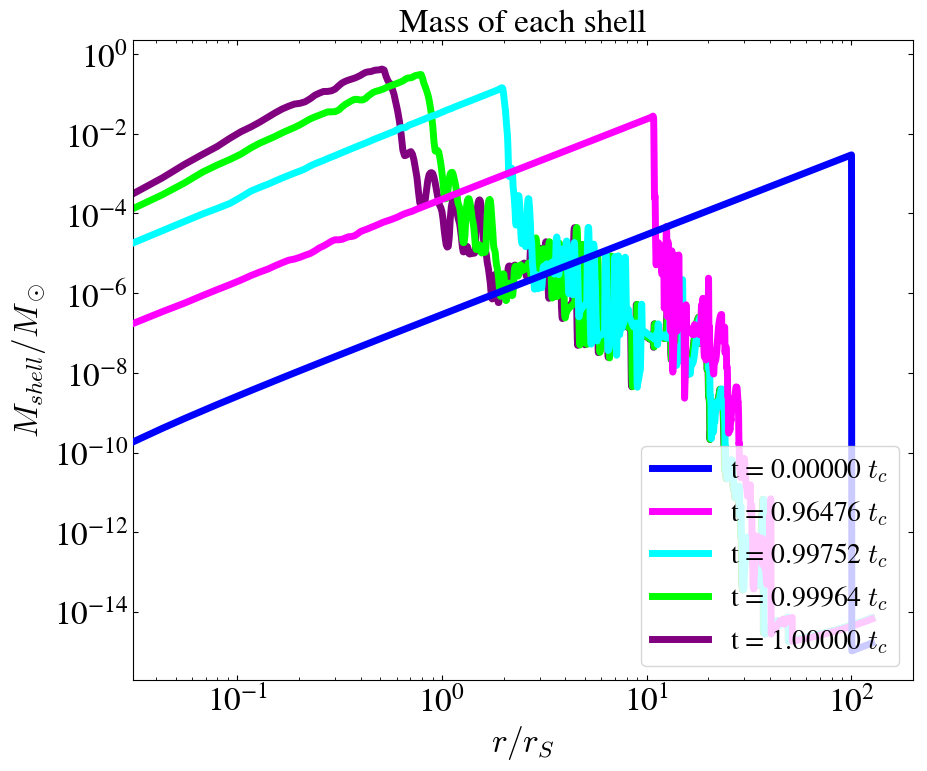

In [15]:
with plt.style.context("yt.default"):
    fig, ax = plt.subplots(figsize=(10,8))
    for i in range(len(profiles_dens[:])):
        ax.plot(r_shell, (mass_shell[i, :])/2e33, label=labels_dens[i], color=custom_colors[i], lw=5, zorder=5-i)

    ax.set_xlabel(r"$r/r_S$")
    ax.set_ylabel(r"$M_{shell}/M_\odot$")
    ax.set_title(r"Mass of each shell")
    ax.set_yscale("log")
    ax.set_xscale("log")
    ax.set_xlim(3.1e-2,2e2)
    ax.legend(loc="lower right")
    # ax.grid()
    fig.subplots_adjust(left=0.12, right=0.9, bottom=0.1, top=0.9, wspace=0.2, hspace=0.2)
# plt.savefig("th_mass01.pdf", format="pdf")
plt.show()

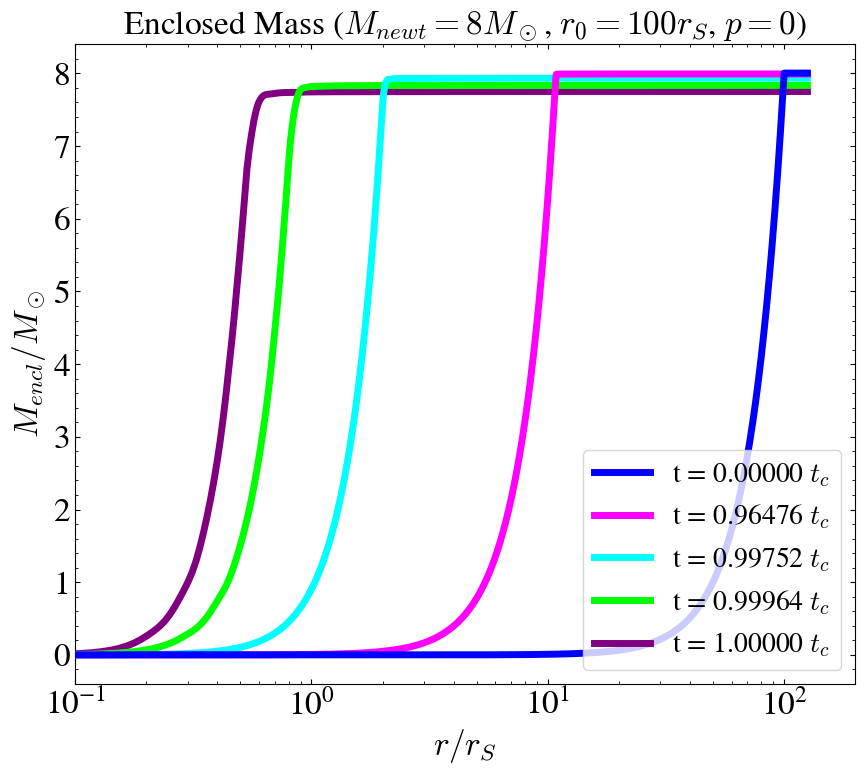

In [16]:
with plt.style.context("yt.default"):
    fig, ax = plt.subplots(figsize=(10,8))
    for i in range(len(profiles_dens[:])):
        ax.plot(r_shell, (massin[i, :])/2e33, label=labels_dens[i], color=custom_colors[i], lw=5, zorder=5-i)

    ax.set_xlabel(r"$r/r_S$")
    ax.set_ylabel(r"$M_{encl}/M_\odot$")
    ax.set_title(r"Enclosed Mass ($M_{newt}=8M_\odot$, $r_0 = 100r_S$, $p=0$)")
    # ax.set_yscale("log")
    ax.set_xscale("log")
    ax.set_xlim(1e-1,2e2)
    ax.legend(loc="lower right")
    # ax.grid()
    fig.subplots_adjust(left=0.12, right=0.9, bottom=0.1, top=0.9, wspace=0.2, hspace=0.2)
# plt.savefig("th_mass02.pdf", format="pdf")
plt.show()

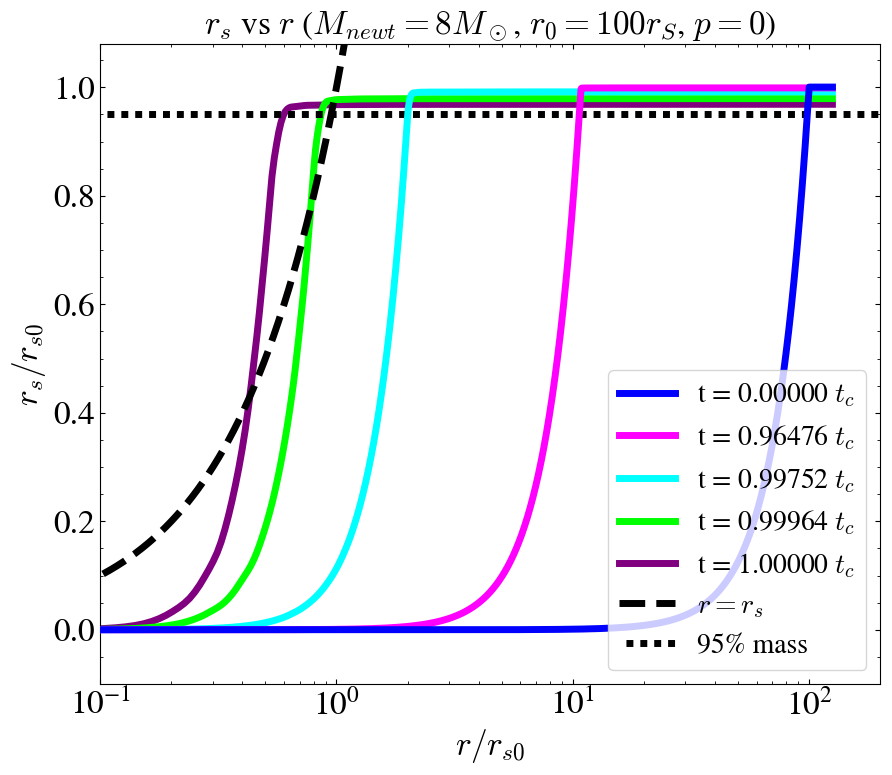

In [18]:
# x and y values for plotting r = r_S
x = np.linspace(-0.05, 1.5, 1000)
y = x

# plot the Schwarzschild radius vs radius
with plt.style.context("yt.default"):
    fig, ax = plt.subplots(figsize=(10,8))
    for i in range(len(profiles_dens[:])):
        ax.plot(r_shell, (2*G*(massin[i, :])/c**2)/Rs.value, label=labels_dens[i], color=custom_colors[i], lw=5, zorder=5-i)

    ax.plot(x, y, "k--", label=r"$r=r_s$", lw=5)
    ax.hlines(y=0.95, xmin=1e-1, xmax=2e2, linewidth=5, color='k', linestyle=(1, (1,1)), label="95% mass")
    ax.set_xlabel(r"$r/r_{s0}$")  # r_s0 is the Schwarzschild radius for the initial mass distribution
    ax.set_ylabel(r"$r_s/r_{s0}$")
    ax.set_title(r"$r_s$ vs $r$ ($M_{newt}=8M_\odot$, $r_0 = 100r_S$, $p=0$)")
    # ax.set_yscale("log")
    ax.set_xscale("log")
    ax.set_xlim(1e-1,2e2)
    ax.set_ylim(-1e-1,1.08)
    ax.legend(loc="lower right")
    # ax.grid()
    fig.subplots_adjust(left=0.12, right=0.9, bottom=0.1, top=0.9, wspace=0.2, hspace=0.2)
# plt.savefig("th_rrs.png")
plt.show()

/tmp/ipykernel_5784/3628080744.py:11: RuntimeWarning: invalid value encountered in power
  R=(3/2*tr)**(2/3.)  # in units of Rs
/tmp/ipykernel_5784/3628080744.py:12: RuntimeWarning: divide by zero encountered in divide
  rho=(R0/R)**3    # rho/rho0


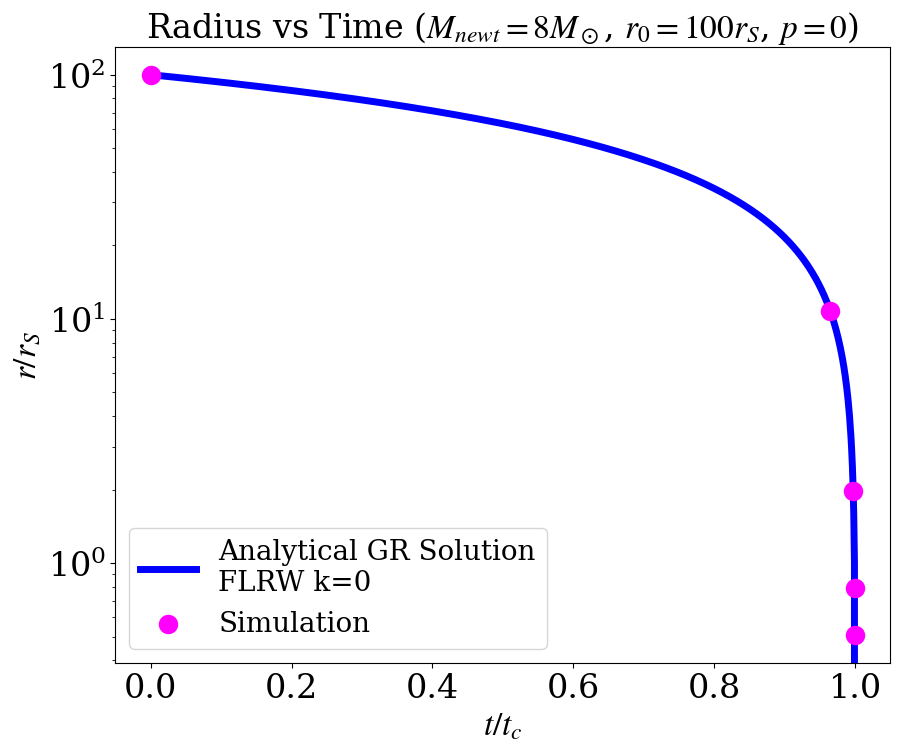

In [35]:
# compare analytical radius with simulation radius

def R_FLRW(R0,steps,plot=False):
    """Inputs: radius R0 in units of Rs and number of time steps
      Outputs: t ad R(t) for flat FLRW metric
    """
    tc=2/3*np.sqrt(R0**3)   # collapse time
    t=np.arange(0,tc+1,tc/steps)
    tr=tc-t  # time remaing to singular collapse
    tBH=tc-2/3.  # time to BH collapse
    R=(3/2*tr)**(2/3.)  # in units of Rs
    rho=(R0/R)**3    # rho/rho0
    if (plot):
        plt.plot(t/tc,R,"-",alpha=1,lw=5,label="Analytical GR Solution"+"\nFLRW k=0", zorder=0, color="blue")       
    return t,R
plt.figure(figsize=(10,8))
t1,R1 = R_FLRW(100,1000.,plot=True)

plt.scatter(T, R, color="fuchsia", lw=8, label="Simulation", zorder=1)
plt.ylabel(r"$r/r_S$")
plt.xlabel(r"$t/t_c$")
plt.yscale("log")
# plt.grid()
# plt.xscale("log")
plt.legend()
plt.title('Radius vs Time ($M_{newt}=8M_\odot$, $r_0 = 100r_S$, $p=0$)')
# plt.savefig('th_rvt1.png')
plt.show()

/tmp/ipykernel_5784/1967009822.py:26: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(0, 1e8)


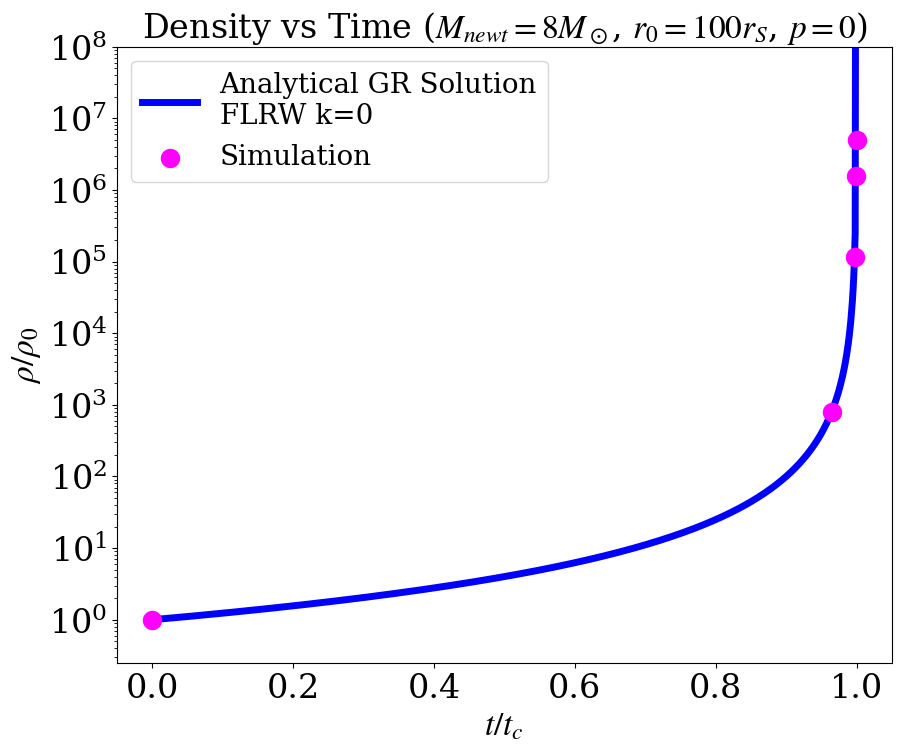

In [26]:
# compare analytical density with simulation results

def R_FLRW(R0,steps,plot=False):
    """Inputs: radius R0 in units of Rs and number of time steps
      Outputs: t ad rho(t) for flat FLRW metric
    """
    tc=2/3*np.sqrt(R0**3)   # collapse time
    t=np.arange(0,tc,tc/steps)
    tr=tc-t  # time remaing to singular collapse
    tBH=tc-2/3.  # time to BH collapse
    R=(3/2*tr)**(2/3.)  # in units of Rs
    R[-1] = 0.01
    rho=(R0/R)**3    # rho/rho0
    if (plot):
        plt.plot(t/tc,rho,"-",alpha=1,lw=5,label="Analytical GR Solution"+"\nFLRW k=0", zorder=0, color="blue")         
    return t,R

D2 = []
for j in range(len(indx)):
    D2.append(np.average(den[j][:indx[j]]))
    
plt.figure(figsize=(10,8))
t1,R1 = R_FLRW(100,1000,plot=True)
plt.scatter(T[:], D2[:], color="fuchsia", lw=8, label="Simulation", zorder=1)
plt.xlabel(r'$t/t_c$')
plt.ylabel(r'$\rho/\rho_0$')
plt.yscale('log')
plt.ylim(0, 1e8)
plt.legend()
# plt.grid()
plt.title('Density vs Time ($M_{newt}=8M_\odot$, $r_0 = 100r_S$, $p=0$)')
# plt.savefig('th_dvt1.png')
plt.show()

In [28]:
# output the momentum profiles
profiles_mom = []
labels_mom = []
mom = []
tmom = []


for ds in data:
    # add a new density field with the required units
    ds.add_field(("boxlib", "my_momentum"), units="dimensionless", function=my_momentum, sampling_type='cell', force_override=True)
    # add a new radius field with the required units
    ds.add_field(("gas", "my_r"), units="dimensionless", function=my_r, sampling_type='cell', force_override=True)
    my_sphere = ds.sphere([0.0, 0.0, 0.0], rb)
    profile = yt.create_profile(
    data_source=my_sphere,
    bin_fields=[("gas", "my_r")],
    fields=[("boxlib", "my_momentum")],
    n_bins=NB,
    units=dict(my_r="dimensionless", my_momentum="dimensionless"),
    logs=dict(my_r=False, my_momentum=False),
    weight_field=None,
    extrema=dict(my_r=(0, rm)),
    )
    profiles_mom.append(profile)
    labels_mom.append(rf"t = {ds.current_time.value/tc.value:.5f} $t_c$")
    tmom.append(ds.current_time.value/tc.value)
    mom.append(np.max(profile[('boxlib', 'my_momentum')]).value)

In [29]:
# output the velocity profiles
profiles_vel = []
labels_vel = []


for ds in data:
    # add a new density field with the required units
    ds.add_field(("boxlib", "my_velocity"), units="dimensionless", function=my_velocity, sampling_type='cell', force_override=True)
    # add a new radius field with the required units
    ds.add_field(("gas", "my_r"), units="dimensionless", function=my_r, sampling_type='cell', force_override=True)
    my_sphere = ds.sphere([0.0, 0.0, 0.0], rb)
    profile = yt.create_profile(
    data_source=my_sphere,
    bin_fields=[("gas", "my_r")],
    fields=[("boxlib", "my_velocity")],
    n_bins=NB,
    units=dict(my_r="dimensionless", my_velocity="dimensionless"),
    logs=dict(my_r=False),
    weight_field=None,
    extrema=dict(my_r=(0, rm)),
    )
    profiles_vel.append(profile)
    labels_vel.append(rf"t = {ds.current_time.value/tc.value:.5f} $t_c$")

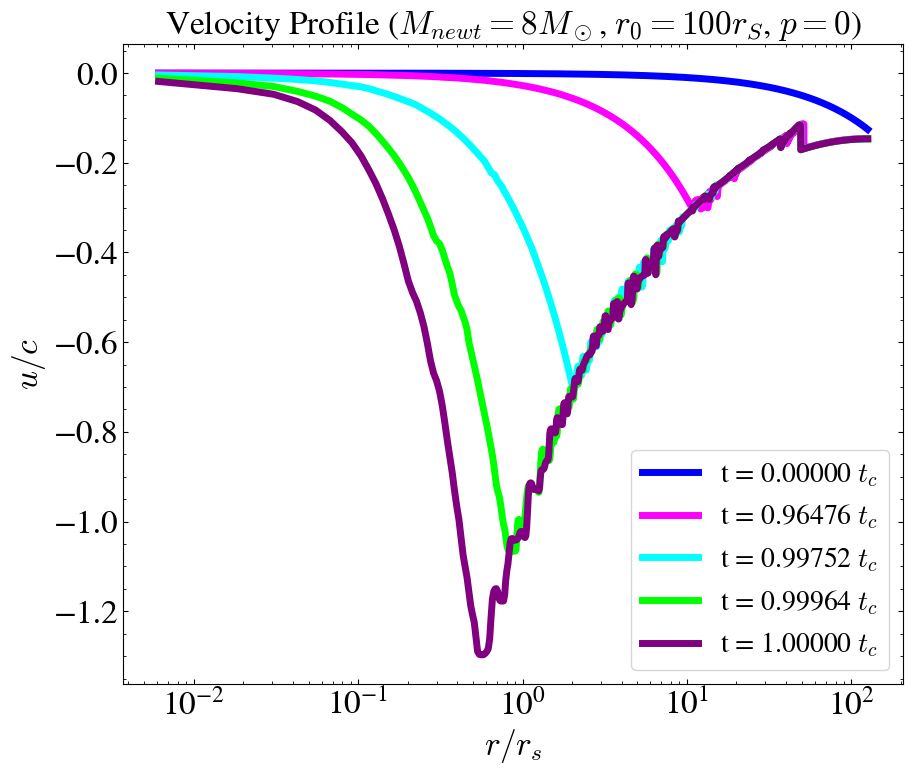

In [36]:
vel = []  # initialize a list to store velocity profiles as numpy arrays
for i in range(len(profiles)):
    vel.append(np.asarray(profiles_vel[i]["boxlib", "my_velocity"]))
    
with plt.style.context("yt.default"):
    fig, ax = plt.subplots(figsize=(10,8))
    for i in range(len(profiles_dens[:])):
        ax.plot(r_shell, vel[i], label=labels_dens[i], color=custom_colors[i], lw=5)

    ax.set_xlabel(r"$r/r_s$")
    ax.set_ylabel(r"$u/c$")
    ax.set_title(r"Velocity Profile ($M_{newt}=8M_\odot$, $r_0 = 100r_S$, $p=0$)")
    # ax.set_yscale("log")
    ax.set_xscale("log")
    # ax.set_xlim(2e-2, 2e2)
    ax.legend(loc="lower right")
    # ax.grid()
    fig.subplots_adjust(left=0.12, right=0.9, bottom=0.1, top=0.9, wspace=0.2, hspace=0.2)
# plt.savefig("th_vel1.png")
plt.show()